In [ ]:
#Agradecimientos a https://relopezbriega.github.io/blog/2017/01/18/problemas-de-optimizacion-con-python/

!pip install pulp #Para modelar problemas lineales
!pip install pyomo #Optimization Modeling

     |████████████████████████████████| 41.2 MB 76 kB/s 
     |████████████████████████████████| 9.1 MB 5.2 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import optimize
import cvxopt
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

np.random.seed(1984) #replicar random

%matplotlib inline

In [ ]:
# Mínimos cuadrados no lineales utilizando scipy.optimize
Ws = (0.25, 0.15, 0.14, 0.15)

# funcion modelo
def f(x, w0, w1, w2, w3):
    return w0 + w1 * x + w2 * x**2 + w3*x**3

# datos aleatorios para simular las observaciones
xdata = np.linspace(0, 1, 10)
y = f(xdata, *Ws)
#ydata = y + 0.05 * np.random.randn(len(xdata))
ydata = 0.5 + 0.4 * np.sin(2*np.pi*xdata) + 0.01*np.random.randn(len(xdata))

def comp(x):
  return 0.5 + 0.4 * np.sin(2*np.pi*xdata) 

# función residual / objetivo / o medida del error
def g(Ws):
    return ydata - f(xdata, *Ws)

# iniciar la optimización
beta_start = (10, 0.000000005, 0.00000005, 0.000000005)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([  0.47666306,   4.32666619, -12.88684859,   8.62025941])

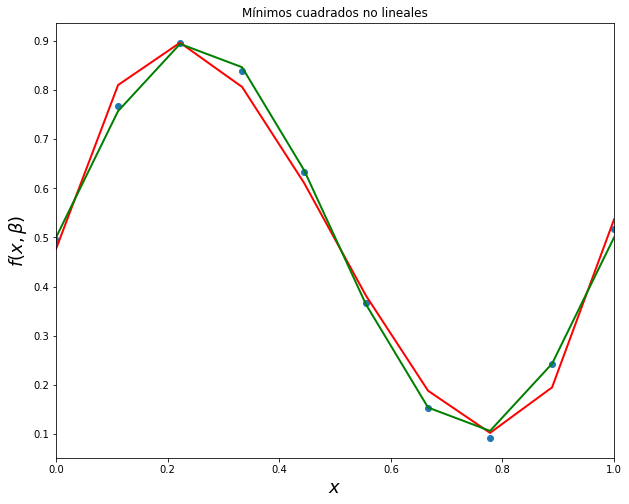

In [ ]:
# graficamos
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xdata, ydata)
ax.plot(xdata, f(xdata, *beta_opt), 'r', lw=2)
ax.plot(xdata, comp(xdata), 'g', lw=2)
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.set_title('Mínimos cuadrados no lineales')
plt.show()
